1.Importing all the Libraries

2.Creating Own Dataset

3.Creating X_train,X_test,y_train,y_test

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

#print(type(X_train))

print(len(X_train))

print(len(X_test))

7500
2500


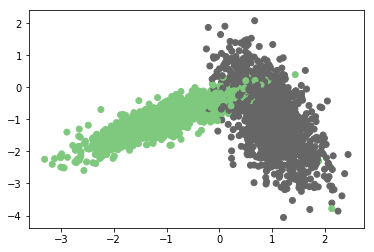

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
#colors = {0:'orange', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap="Accent_r")
plt.show()

# Implementing Custom RandomSearchCV with K-folds CV

In [14]:
from sklearn.metrics import accuracy_score

def select_100_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(1*len(x_train)))

def split_traindata_into_k_folds(x_train,folds):
    
    fold_size = int(len(x_train)/folds)
    
    list_of_limits = []
    
    board = []    
    for i in range(folds):
        board.append([])
    
    #print(board)
    for i in range(len(x_train)+1):
        if (i % fold_size) == 0:
            list_of_limits.append(i)
    #print(list_of_limits)
    
    x = 0
    y = 1
    
    for i in range(folds):
        
        for j in x_train[list_of_limits[x]:list_of_limits[y]]:
            
            board[i].append(list(j))    
        x = x + 1
        y = y + 1
    
    #print(len(board[0]))
    #print(len(board[1]))
    #print(len(board[2]))
    
    return board

def RandomSearch(x_train,y_train,classifier, params, folds):
    
    trainscores = []
    cvscores  = []

    board = []    
    for i in range(folds):
        board.append([])
    
    board = split_traindata_into_k_folds(x_train,folds)
    
    temp = board[:]
    
    k = folds - 1
    
    for i in range(folds):
        for j in range(folds):
            if i != j and j != k:
                board[i] = np.append(board[i],temp[j],axis = 0)
                
        k = k + 1
        if k == folds:
            k = 0
        
    for k in params:
        
        #print(k)
        
        trainscores_folds = []
        testscores_folds  = []
        
        for j in range(0, folds):
            
            train_indices = select_100_percent_indices_in_range_from_1_to_len(board[j])
            test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))
            
        
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,cvscores

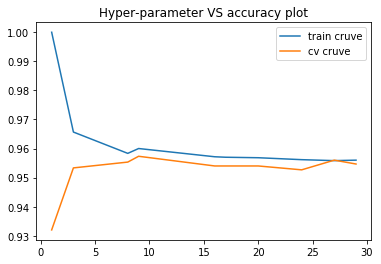

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params_range = (1,30)

params = random.sample(range(params_range[0],params_range[1]), 10)

folds = 5

params.sort()

trainscores,cvscores = RandomSearch(X_train, y_train, neigh, params, folds)

#print(trainscores)
#print(cvscores)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

Observations:

1.At k = 29,we are getting highest accurency

2.Also gype between train and cv cureve is minimum at k = 27

3.Hence we can choose k =29

In [19]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

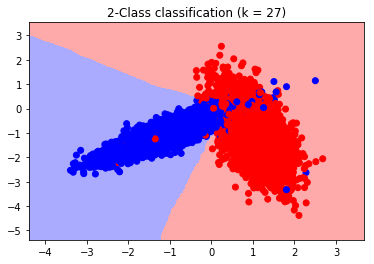

In [22]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 27)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)